## Problem Statement 
You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.
You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:
1. Credit card / Prepaid card
2. Bank account services
3. Theft/Dispute reporting
4. Mortgages/loans
5. Others

With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [9]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint


## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [10]:
with open('complaints-2021-05-14_08_16.json') as data_file:    
    data = json.load(data_file)

## Data preparation

#### Inspecting the dataframe and it has 22 columns and 78313 rows

In [11]:
# Inspect the dataframe to understand the given data.
df=pd.json_normalize(data)
df

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78308,complaint-public-v2,complaint,3105617,0.0,None,08857,3105617,Closing an account,2018-12-20T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-21T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
78309,complaint-public-v2,complaint,3091984,0.0,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,complaint-public-v2,complaint,3133355,0.0,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,complaint-public-v2,complaint,3110963,0.0,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided


#### printing the column names

In [12]:
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [14]:
#Assign new column names
df.rename(columns={'_index':'index',
  '_type':'type',
  '_id':'id',
  '_score':'score',
  '_source.tags':'tags',
  '_source.zip_code':'',
 '_source.complaint_id':'complaint_id',
 '_source.issue':'issue',
 '_source.date_received':'date_received',
 '_source.state':'state',
 '_source.consumer_disputed':'consumer_disputed',
 '_source.product':'product',
 '_source.company_response':'company_response',
 '_source.company':'company',
 '_source.submitted_via':'submitted_via',
 '_source.date_sent_to_company':'date_sent_to_company',
 '_source.company_public_response':'company_public_response',
 '_source.sub_product':'sub_product',
 '_source.timely':'timely',
 '_source.complaint_what_happened':'complaint_what_happened',
 '_source.sub_issue':'sub_issue',
 '_source.consumer_consent_provided':'consumer_consent_provided'},inplace=True)

#### our notes - checking for NaN using complaint_id and issue columns

In [15]:
#Assign nan in place of blanks in the complaints column
df[['complaint_what_happened','issue']].replace('', np.nan, inplace=True)

C:\Users\sndur\AppData\Local\Temp\ipykernel_19368\1984297707.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
# Null values count after replacing blanks with nan
df[['complaint_what_happened','issue']].isnull().sum()

complaint_what_happened    0
issue                      0
dtype: int64

In [17]:
#Remove all rows where complaint_what_happened column is nan
df.dropna(subset=['complaint_what_happened'],inplace=True)

#### Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers

#### our notes - taking only those columns that has text as data 

In [18]:
# List of columns to preprocess (manually selected based on inspection)
text_columns = [
    'tags', 'issue', 'consumer_disputed', 'product', 
    'company_response', 'company', 'submitted_via', 
    'company_public_response', 'sub_product', 'complaint_what_happened', 
    'sub_issue', 'consumer_consent_provided'
]

In [19]:
# defining a function for text preprocessing
def pre_process_text(text):
    if pd.isna(text):
        return text
    text = text.lower()                                                                                 # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)                                                                 # Remove text in square brackets
    text = re.sub(r'[^\w\s]', '', text)                                                                 # Remove punctuation
    text = ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))          # Remove words containing numbers
    return text


In [20]:
# apply the preprocessing function to each text column
for col in text_columns:
    df[col] = df[col].apply(pre_process_text)

# verify the changes
print(df.head())

                 index       type       id  score           tags         \
0  complaint-public-v2  complaint  3211475    0.0           None  90301   
1  complaint-public-v2  complaint  3229299    0.0  servicemember  319XX   
2  complaint-public-v2  complaint  3199379    0.0           None  77069   
3  complaint-public-v2  complaint  2673060    0.0           None  48066   
4  complaint-public-v2  complaint  3203545    0.0           None  10473   

  complaint_id                              issue              date_received  \
0      3211475  attempts to collect debt not owed  2019-04-13T12:00:00-05:00   
1      3229299    written notification about debt  2019-05-01T12:00:00-05:00   
2      3199379   other features terms or problems  2019-04-02T12:00:00-05:00   
3      2673060     trouble during payment process  2017-09-13T12:00:00-05:00   
4      3203545                   fees or interest  2019-04-05T12:00:00-05:00   

  state  ...         company_response            company submitted_v

#### Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].

In [21]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10060] A connection attempt failed because
[nltk_data]     the connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


#### our notes - this is the function to map NLTK POS tags to WordNet POS tags

In [22]:
def get_from_wordnet_pos(word_tag):
    if word_tag.startswith('J'):
        return wordnet.ADJ
    elif word_tag.startswith('V'):
        return wordnet.VERB
    elif word_tag.startswith('N'):
        return wordnet.NOUN
    elif word_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


#### define a function for text preprocessing, lemmatization, and POS filtering

In [23]:
def preprocess_and_filter_text(text):
    if not text:  # Skip empty text
        return ""
    words = word_tokenize(text)
    words_pos = pos_tag(words)
    filtered_words = [
        lemmatizer.lemmatize(word, get_from_wordnet_pos(tag)) if get_from_wordnet_pos(tag) else word 
        for word, tag in words_pos if tag == 'NN'
    ]
    return ' '.join(filtered_words)

In [24]:
for col in text_columns:
    df[col] = df[col].apply(preprocess_and_filter_text)

# Verify the changes
print(df.head())

                 index       type       id  score           tags         \
0  complaint-public-v2  complaint  3211475    0.0                 90301   
1  complaint-public-v2  complaint  3229299    0.0  servicemember  319XX   
2  complaint-public-v2  complaint  3199379    0.0                 77069   
3  complaint-public-v2  complaint  2673060    0.0                 48066   
4  complaint-public-v2  complaint  3203545    0.0                 10473   

  complaint_id                    issue              date_received state  ...  \
0      3211475                     debt  2019-04-13T12:00:00-05:00    CA  ...   
1      3229299        notification debt  2019-05-01T12:00:00-05:00    GA  ...   
2      3199379                           2019-04-02T12:00:00-05:00    TX  ...   
3      2673060  trouble payment process  2017-09-13T12:00:00-05:00    MI  ...   
4      3203545                 interest  2019-04-05T12:00:00-05:00    NY  ...   

  company_response   company submitted_via       date_sent_to_

#### our notes - creating a new dataframe with original and lemmatized complaints

In [25]:
df_clean = pd.DataFrame()
df_clean['complaint_what_happened'] = df['complaint_what_happened']
df_clean['lemmatized_complaints'] = df_clean['complaint_what_happened'].apply(preprocess_and_filter_text)

In [26]:
# adding category and sub_category columns to the dataframe for better topic identification
df_clean['category'] = df['product']
df_clean['sub_category'] = df['sub_product']

#### our notes - function to extract POS tags and remove words with tags other than 'NN'

In [27]:
def filter_nouns(text):
    words = word_tokenize(text)
    words_pos = pos_tag(words)
    filtered_words = [
        word for word, tag in words_pos if tag == 'NN'
    ]
    return ' '.join(filtered_words)

#### apply the POS tag filter function

In [28]:
df_clean["complaint_POS_removed"] = df_clean["lemmatized_complaints"].apply(filter_nouns)
print(df_clean)             # verify the changes

                                 complaint_what_happened  \
0                                                          
1      morning name stop bank cardmember debt verific...   
2      i card agent upgrade date agent information or...   
3                                                          
4                                                          
...                                                  ...   
78308                                                      
78309  xxxxxxxx i chas visa credit card provider clai...   
78310  i pay risk bank app chase mobile banking i mer...   
78311  i credit credit chase freedom xxxx balance lif...   
78312  jp bank xxxx order line credit i i account pay...   

                                   lemmatized_complaints          category  \
0                                                          debt collection   
1      morning name bank debt verification statement ...   debt collection   
2      card agent date agent information orde

In [29]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaint_what_happened,lemmatized_complaints,category,sub_category,complaint_POS_removed
0,,,debt collection,credit card debt,
1,morning name stop bank cardmember debt verific...,morning name bank debt verification statement ...,debt collection,credit card debt,morning name bank debt verification statement ...
2,i card agent upgrade date agent information or...,card agent date agent information order accoun...,credit card card,credit card charge card,card agent date agent information order accoun...
3,,,mortgage,home mortgage,
4,,,credit card card,credit card charge card,
...,...,...,...,...,...
78308,,,,account,
78309,xxxxxxxx i chas visa credit card provider clai...,xxxxxxxx i credit card provider claim purchase...,credit card card,credit card charge card,xxxxxxxx i credit card provider claim purchase...
78310,i pay risk bank app chase mobile banking i mer...,pay risk bank banking i merchant merchant comm...,,account,pay risk bank banking merchant merchant commun...
78311,i credit credit chase freedom xxxx balance lif...,i credit credit chase freedom balance life exp...,credit card card,credit card charge card,i credit credit chase freedom balance life exp...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [30]:
# # Write your code here to visualise the data according to the 'Complaint' character length
# # Write your code here to visualise the data according to the 'Complaint' character length
# df_clean['complaint_length'] = df_clean['complaint_what_happened'].str.len()
# df_clean['complaint_what_happened_lemmatized_length'] = df_clean['lemmatized_complaints'].str.len()
# df_clean['complaint_POS_removed_length'] = df_clean['complaint_POS_removed'].str.len()

# fig = go.Figure()
# fig.add_trace(go.Histogram(x=df_clean['complaint_length'], name='Complaint'))
# fig.add_trace(go.Histogram(x=df_clean['complaint_what_happened_lemmatized_length'], name='Complaint Lemmatized'))
# fig.add_trace(go.Histogram(x=df_clean['complaint_POS_removed_length'], name='Complaint POS Removed'))
# fig.update_layout(barmode='overlay', title='Complaint Character Length', xaxis_title='Character Length', yaxis_title='Count')
# fig.update_traces(opacity=0.75)
# fig.show()


##########################
# we dont need the above code or below code
##########################
# # Calculate the length of each complaint in different stages
# df_clean['complaint_length'] = df_clean['complaint_what_happened'].apply(lambda x: len(x) if isinstance(x, str) else 0)
# df_clean['complaint_what_happened_lemmatized_length'] = df_clean['lemmatized_complaints'].apply(lambda x: len(x) if isinstance(x, str) else 0)
# df_clean['complaint_POS_removed_length'] = df_clean['complaint_POS_removed'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# # Plot the histograms of complaint lengths
# plt.figure(figsize=(18, 6))

# plt.subplot(1, 3, 1)
# plt.hist(df_clean['complaint_length'], bins=50, color='skyblue', edgecolor='black')
# plt.title('Distribution of Raw Complaint Character Lengths')
# plt.xlabel('Character Length')
# plt.ylabel('Frequency')

# plt.subplot(1, 3, 2)
# plt.hist(df_clean['complaint_what_happened_lemmatized_length'], bins=50, color='skyblue', edgecolor='black')
# plt.title('Distribution of Lemmatized Complaint Character Lengths')
# plt.xlabel('Character Length')
# plt.ylabel('Frequency')

# plt.subplot(1, 3, 3)
# plt.hist(df_clean['complaint_POS_removed_length'], bins=50, color='skyblue', edgecolor='black')
# plt.title('Distribution of POS Removed Complaint Character Lengths')
# plt.xlabel('Character Length')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()


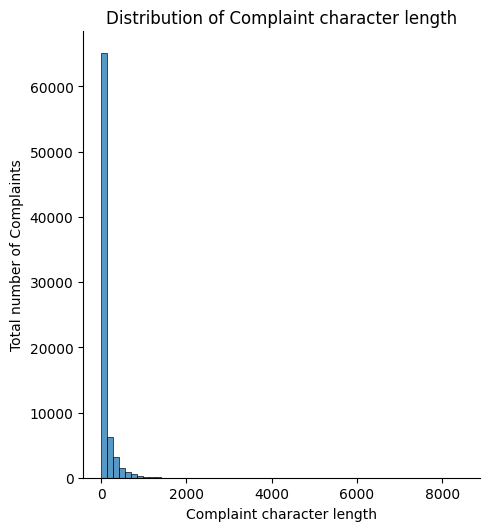

In [31]:
char_len = [len(each_sent) for each_sent in df_clean['complaint_POS_removed']]

sns.displot(char_len, kind='hist', bins=60)
plt.xlabel("Complaint character length")
plt.ylabel("Total number of Complaints")
plt.title("Distribution of Complaint character length")
plt.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

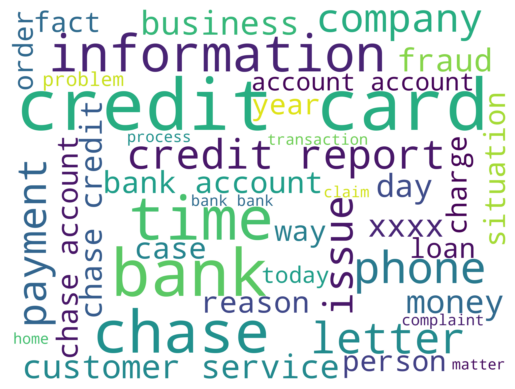

In [32]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
stopwords = nlp.Defaults.stop_words
wordcloud=WordCloud(stopwords=stopwords, background_color='white', width=2000, height=1500,max_words=40).generate(' '.join(df_clean['complaint_POS_removed']))
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

In [33]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [34]:
# function to get the specified top n-grams
def get_top_n_words(corpus, n=None,count=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:count]

In [35]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 

unigram = get_top_n_words(df_clean['Complaint_clean'], 1,30)
for word, freq in unigram:
    print(word, freq)
px.bar(x=[word for word, freq in unigram], y=[freq for word, freq in unigram], title='Top30 Unigrams')

credit 32671
account 29744
chase 28367
bank 26643
card 21078
payment 13964
time 11968
money 11949
loan 10005
information 9644
letter 8425
mortgage 7932
number 7739
phone 7499
amount 7260
fraud 7081
balance 6990
company 6523
customer 6436
report 5834
day 5507
business 5460
service 5362
charge 5311
interest 5232
transaction 4992
home 4826
department 4693
date 4388
claim 4330


In [36]:
#Print the top 10 words in the unigram frequency
unigram = get_top_n_words(df_clean['Complaint_clean'], 1,10)
for word, freq in unigram:
    print(word, freq)
px.bar(x=[word for word, freq in unigram], y=[freq for word, freq in unigram], title='Top 10 Unigrams')

credit 32671
account 29744
chase 28367
bank 26643
card 21078
payment 13964
time 11968
money 11949
loan 10005
information 9644


In [37]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
bigram = get_top_n_words(df_clean['Complaint_clean'], 2,30)
for word, freq in bigram:
    print(word, freq)
px.bar(x=[word for word, freq in bigram], y=[freq for word, freq in bigram], title='Top 30 Bigrams')

credit card 10787
credit report 3303
customer service 3026
chase credit 2609
bank account 2514
chase account 2259
account account 1979
bank bank 1801
account bank 1664
payment payment 1436
credit score 1363
money account 1357
credit credit 1321
card credit 1306
account credit 1304
credit bureau 1205
phone number 1162
card account 1122
interest rate 1078
bank credit 1074
fraud department 1071
account chase 1067
card chase 967
chase bank 962
loan modification 959
card company 937
letter chase 929
account money 883
account balance 863
card card 845


In [38]:
#Print the top 10 words in the bigram frequency
bigram = get_top_n_words(df_clean['Complaint_clean'], 2,10)
for word, freq in bigram:
    print(word, freq)
fig1=px.bar(x=[word for word, freq in bigram], y=[freq for word, freq in bigram], title='Top 10 Bigrams')
fig1.show()

credit card 10787
credit report 3303
customer service 3026
chase credit 2609
bank account 2514
chase account 2259
account account 1979
bank bank 1801
account bank 1664
payment payment 1436


In [39]:
#Print the top 30 words in the trigram frequency and plot the same using a bar graph
trigram = get_top_n_words(df_clean['Complaint_clean'], 3,30)
for word, freq in trigram:
    print(word, freq)

chase credit card 1440
credit card company 831
credit card credit 762
credit card account 626
credit report credit 541
credit card chase 524
card credit card 521
credit card bank 408
bank credit card 386
credit card card 305
bank account bank 299
account credit card 295
payment payment payment 265
account bank account 257
account account account 242
credit card balance 232
charge credit card 220
freedom credit card 218
credit score credit 216
account chase account 213
credit card payment 211
consumer protection bureau 208
chase freedom credit 208
inquiry credit report 203
credit card number 196
credit card statement 196
bank bank bank 193
credit card information 192
credit credit card 185
account credit report 182


In [40]:
#Print the top 10 words in the trigram frequency and plot the same using a bar graph
trigram = get_top_n_words(df_clean['Complaint_clean'], 3,10)
for word, freq in trigram:
    print(word, freq)
        
fig1=px.bar(x=[word for word, freq in trigram], y=[freq for word, freq in trigram], title='Top 10 Trigrams')
fig1.show()

chase credit card 1440
credit card company 831
credit card credit 762
credit card account 626
credit report credit 541
credit card chase 524
card credit card 521
credit card bank 408
bank credit card 386
credit card card 305


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [41]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [42]:
df_clean

,complaint_what_happened,lemmatized_complaints,category,sub_category,complaint_POS_removed,Complaint_clean
0,,,debt collection,credit card debt,,
1,morning name stop bank cardmember debt verific...,morning name bank debt verification statement ...,debt collection,credit card debt,morning name bank debt verification statement ...,morning name bank debt verification statement ...
2,i card agent upgrade date agent information or...,card agent date agent information order accoun...,credit card card,credit card charge card,card agent date agent information order accoun...,card agent date agent information order accoun...
3,,,mortgage,home mortgage,,
4,,,credit card card,credit card charge card,,
...,...,...,...,...,...,...
78308,,,,account,,
78309,xxxxxxxx i chas visa credit card provider clai...,xxxxxxxx i credit card provider claim purchase...,credit card card,credit card charge card,xxxxxxxx i credit card provider claim purchase...,i credit card provider claim purchase protect...
78310,i pay risk bank app chase mobile banking i mer...,pay risk bank banking i merchant merchant comm...,,account,pay risk bank banking merchant merchant commun...,pay risk bank banking merchant merchant commun...
78311,i credit credit chase freedom xxxx balance lif...,i credit credit chase freedom balance life exp...,credit card card,credit card charge card,i credit credit chase freedom balance life exp...,i credit credit chase freedom balance life exp...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [43]:
#to initialise the TfidfVectorizer 
tf_idf_vec=TfidfVectorizer(max_df=0.98,min_df=2,stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [44]:
#to create the document term matrix by transforming the complaints column present in df_clean.
tfidf=tf_idf_vec.fit_transform(df_clean['Complaint_clean'])

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [45]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [46]:
# nmf_model with the n_components i.e 5
num_topics = 5

nmf_model = NMF(n_components=num_topics, random_state=40)

In [47]:
nmf_model.fit(tfidf)
len(tf_idf_vec.get_feature_names_out())

4656

In [48]:
# print the top 15 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index} with tf-idf score')
    print([tf_idf_vec.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0 with tf-idf score
['access', 'deposit', 'phone', 'time', 'customer', 'branch', 'check', 'information', 'business', 'number', 'fraud', 'balance', 'money', 'chase', 'account']


THE TOP 15 WORDS FOR TOPIC #1 with tf-idf score
['fraud', 'limit', 'bureau', 'debt', 'time', 'inquiry', 'letter', 'score', 'charge', 'information', 'company', 'chase', 'report', 'card', 'credit']


THE TOP 15 WORDS FOR TOPIC #2 with tf-idf score
['company', 'process', 'foreclosure', 'sale', 'information', 'house', 'rate', 'letter', 'time', 'property', 'modification', 'home', 'chase', 'mortgage', 'loan']


THE TOP 15 WORDS FOR TOPIC #3 with tf-idf score
['department', 'time', 'phone', 'branch', 'cash', 'deposit', 'person', 'fraud', 'number', 'day', 'claim', 'transaction', 'check', 'money', 'bank']


THE TOP 15 WORDS FOR TOPIC #4 with tf-idf score
['plan', 'mortgage', 'history', 'credit', 'car', 'phone', 'day', 'fee', 'auto', 'date', 'time', 'statement', 'month', 'balance', 'payment']


In [49]:
# creating the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_values = nmf_model.transform(tfidf)
topic_values.argmax(axis=1)

array([0, 3, 0, ..., 0, 4, 4], dtype=int64)

In [50]:
# assigning the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_values.argmax(axis=1)

In [51]:
df_clean.head()

,complaint_what_happened,lemmatized_complaints,category,sub_category,complaint_POS_removed,Complaint_clean,Topic
0,,,debt collection,credit card debt,,,0
1,morning name stop bank cardmember debt verific...,morning name bank debt verification statement ...,debt collection,credit card debt,morning name bank debt verification statement ...,morning name bank debt verification statement ...,3
2,i card agent upgrade date agent information or...,card agent date agent information order accoun...,credit card card,credit card charge card,card agent date agent information order accoun...,card agent date agent information order accoun...,0
3,,,mortgage,home mortgage,,,0
4,,,credit card card,credit card charge card,,,0


In [52]:
#Print the first 5 Complaint for each of the Topics
df_clean=df_clean.groupby('Topic').head(5)
df_clean.sort_values('Topic')

,complaint_what_happened,lemmatized_complaints,category,sub_category,complaint_POS_removed,Complaint_clean,Topic
0,,,debt collection,credit card debt,,,0
2,i card agent upgrade date agent information or...,card agent date agent information order accoun...,credit card card,credit card charge card,card agent date agent information order accoun...,card agent date agent information order accoun...,0
3,,,mortgage,home mortgage,,,0
4,,,credit card card,credit card charge card,,,0
5,,,,account,,,0
32,chase card catering order i amount i chase tod...,card order i amount chase today account i cust...,credit card card,credit card charge card,card order i amount chase today customer rep l...,card order i amount chase today customer rep l...,1
15,inquiry,inquiry,credit credit repair consumer,credit reporting,inquiry,inquiry,1
23,chase credit card credit report company issue,chase credit card credit report company issue,credit card card,credit card charge card,chase credit card credit report company issue,chase credit card credit report company issue,1
10,card application identity consent credit ident...,card application identity consent credit ident...,credit credit repair consumer,consumer report,card application identity consent credit ident...,card application identity consent credit ident...,1
11,book xxxx ticket i offer ticket card i informa...,book xxxx ticket i ticket card i information m...,credit credit repair consumer,credit reporting,book xxxx ticket i card i information minute s...,book ticket i card i information minute scree...,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [53]:
#Create the dictionary of Topic names and Topics
Topic_names = {  
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Theft/Dispute Reporting',
    3: 'Mortgage/Loan',
    4: 'Others'
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

C:\Users\sndur\AppData\Local\Temp\ipykernel_19368\2316214091.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
df_clean.shape

(25, 7)

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [55]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[['complaint_what_happened','Topic']]

In [56]:
training_data.head(10)

,complaint_what_happened,Topic
0,,Bank Account services
1,morning name stop bank cardmember debt verific...,Mortgage/Loan
2,i card agent upgrade date agent information or...,Bank Account services
3,,Bank Account services
4,,Bank Account services
5,,Bank Account services
10,card application identity consent credit ident...,Credit card or prepaid card
11,book xxxx ticket i offer ticket card i informa...,Credit card or prepaid card
14,son deposit chase account fund chase bank acco...,Mortgage/Loan
15,inquiry,Credit card or prepaid card


In [57]:
training_data.shape

(25, 2)

#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

#### Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [58]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

In [59]:
# Splitting the data into training and testing sets
train_data, test_data = train_test_split(training_data, test_size=0.3, random_state=42)

In [60]:
# initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# fit and transform complaint text in training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['complaint_what_happened'])

# transform complaint text in testing data (using the fitted vectorizer)
X_test_tfidf = tfidf_vectorizer.transform(test_data['complaint_what_happened'])

X_train = X_train_tfidf  
X_test = X_test_tfidf

# target variables (y_train and y_test)
y_train = train_data['Topic']
y_test = test_data['Topic']

print("Shape of X_train_tfidf:", X_train.shape)
print("Shape of X_test_tfidf:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_tfidf: (17, 179)
Shape of X_test_tfidf: (8, 179)
Shape of y_train: (17,)
Shape of y_test: (8,)


In [61]:
# run model with grid search
def run_model(model, param_grid, X_train, y_train):
    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=30)
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_estimator_

In [62]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2']
}

In [63]:
# run the model, grid search
best_model = run_model(DecisionTreeClassifier(), params, X_train, y_train)

# evaluate on training set
y_train_preds = best_model.predict(X_train)

Fitting 4 folds for each of 2160 candidates, totalling 8640 fits


c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=4.



In [67]:
def eval_model(y_test, y_pred, eval_type='Testing'):
    print(eval_type, 'results')
   
    # y_pred is converted to numpy array
    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.values  
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: ', precision)
    
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: ', recall)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1 Score: ', f1)
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    # confusion matrix 
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot()

#### Decision Tree evaluating Train data

Training results
Type of y_test: <class 'pandas.core.series.Series'>
Type of y_pred: <class 'numpy.ndarray'>
Shape of y_test: (17,)
Shape of y_pred: (17,)
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Classification Report:
                              precision    recall  f1-score   support

      Bank Account services       1.00      1.00      1.00         4
Credit card or prepaid card       1.00      1.00      1.00         4
              Mortgage/Loan       1.00      1.00      1.00         1
                     Others       1.00      1.00      1.00         4
    Theft/Dispute Reporting       1.00      1.00      1.00         4

                   accuracy                           1.00        17
                  macro avg       1.00      1.00      1.00        17
               weighted avg       1.00      1.00      1.00        17



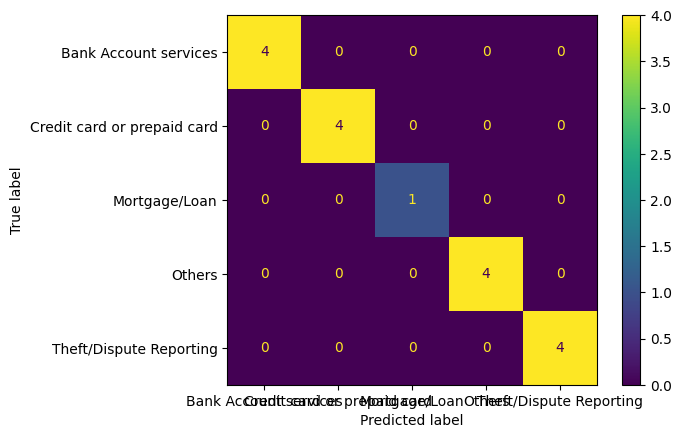

In [68]:
# compute predictions on train set
y_train_preds = best_model.predict(X_train)

# evaluate on train set using eval_model
eval_model(y_train, y_train_preds, eval_type='Training')

#### Decision Tree evaluating Test data

Testing results
Type of y_test: <class 'pandas.core.series.Series'>
Type of y_pred: <class 'numpy.ndarray'>
Shape of y_test: (8,)
Shape of y_pred: (8,)
Accuracy:  0.25
Precision:  0.15625
Recall:  0.25
F1 Score:  0.175
Classification Report:
                              precision    recall  f1-score   support

      Bank Account services       0.25      1.00      0.40         1
Credit card or prepaid card       0.00      0.00      0.00         1
              Mortgage/Loan       0.00      0.00      0.00         4
                     Others       1.00      1.00      1.00         1
    Theft/Dispute Reporting       0.00      0.00      0.00         1

                   accuracy                           0.25         8
                  macro avg       0.25      0.40      0.28         8
               weighted avg       0.16      0.25      0.17         8



c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined

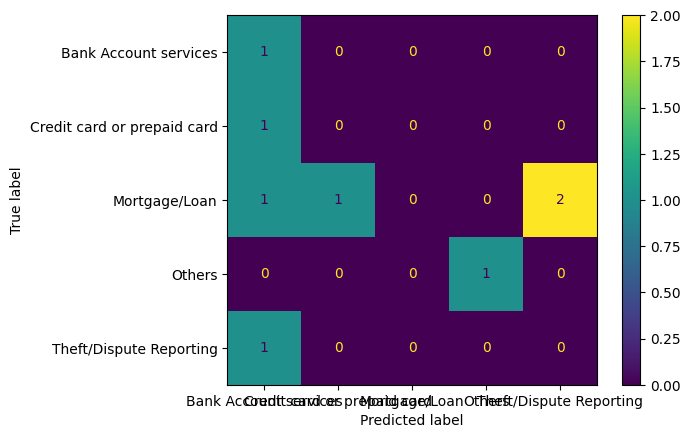

In [69]:
# compute predictions on test set
y_test_preds = best_model.predict(X_test)

# evaluate on test set using eval_model
eval_model(y_test, y_test_preds, eval_type='Testing')

### Logistic regression


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [92]:
# params
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l2'], 'C': [0.1, 1, 10]},
    {'solver': ['saga'], 'penalty': ['l2', 'elasticnet'], 'l1_ratio': [0.5], 'C': [0.1, 1, 10]}
]

In [95]:
def run_model(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid=params, cv=4, verbose=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [96]:
# logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# StratifiedKFold for cross-validation to handle class imbalance
skf = StratifiedKFold(n_splits=4)

# grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=skf, error_score='raise')

# fit the model
try:
    best_logreg_model = grid_search.fit(X_train, y_train)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: ", grid_search.best_score_)
except ValueError as e:
    print(f"Error during model fitting: {e}")

Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score:  0.775


c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=4.

c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning:

l1_ratio parameter is only used when penalt

In [101]:
# defining evaluate function
def eval_model(y_test, y_pred, eval_type='Testing'):
    print(eval_type, 'results')
    
    print('Type of y_test:', type(y_test))
    print('Type of y_pred:', type(y_pred))
    print('Shape of y_test:', y_test.shape)
    print('Shape of y_pred:', y_pred.shape if hasattr(y_pred, 'shape') else len(y_pred))

    # y_pred is converted to numpy array 
    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.values  
    
    # calculate metrics
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot()

#### LR for Test data

Testing results
Type of y_test: <class 'pandas.core.series.Series'>
Type of y_pred: <class 'numpy.ndarray'>
Shape of y_test: (8,)
Shape of y_pred: (8,)
Accuracy:  0.375
Precision:  0.25
Recall:  0.375
F1 Score:  0.29166666666666663
Classification Report:
                              precision    recall  f1-score   support

      Bank Account services       0.50      1.00      0.67         1
Credit card or prepaid card       0.00      0.00      0.00         1
              Mortgage/Loan       0.00      0.00      0.00         4
                     Others       0.50      1.00      0.67         1
    Theft/Dispute Reporting       1.00      1.00      1.00         1

                   accuracy                           0.38         8
                  macro avg       0.40      0.60      0.47         8
               weighted avg       0.25      0.38      0.29         8



c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\sndur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined

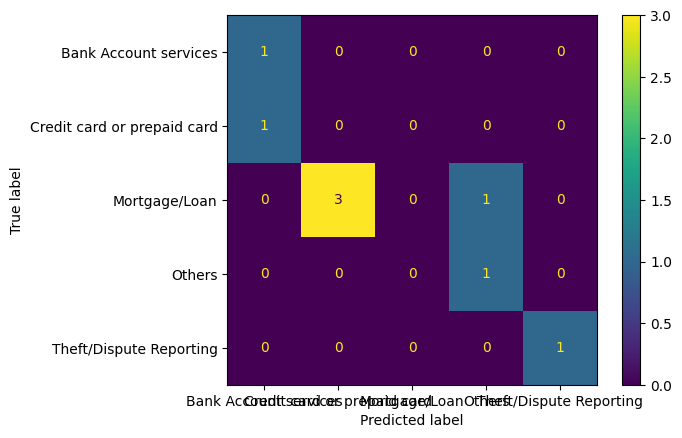

In [102]:
# predict the probabilities on test set
y_pred = best_logreg_model.predict(X_test)

# finally, evaluate the model
eval_model(y_test, y_pred)